In [32]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

# EDA - Career Earning

In [33]:
# Read CSV
salaries = pd.read_csv('clean_salaries.csv')
clean_salaries = pd.read_csv('clean_salaries.csv')
draft_ncaa = pd.read_csv('clean_draft_ncaa_total.csv')
draft_nba = pd.read_csv('clean_draft_nba.csv')
combine_physical = pd.read_csv('combine_physical.csv')
combine_athletic = pd.read_csv('combine_athletic.csv')

In [34]:
# Sort Salaries
salaries_sorted = clean_salaries.sort_values(['player', 'season_start'])
salaries_sorted[:10]

,Unnamed: 0,player,salary,season_end,season_start,team,team_name,salary_proportion,salary_scale,age
4577,4658,A.C. Green,1750000.0,1991,1990,LAL,Los Angeles Lakers,0.005961,59.612417,27.0
4589,4671,A.C. Green,1750000.0,1992,1991,LAL,Los Angeles Lakers,0.004941,49.413532,28.0
4603,4686,A.C. Green,1750000.0,1993,1992,LAL,Los Angeles Lakers,0.004382,43.818227,29.0
8898,9079,A.C. Green,1885000.0,1994,1993,PHO,Phoenix Suns,0.003767,37.674806,30.0
8911,9092,A.C. Green,6472600.0,1995,1994,PHO,Phoenix Suns,0.014297,142.968646,31.0
8926,9107,A.C. Green,6473000.0,1996,1995,PHO,Phoenix Suns,0.009967,99.674629,32.0
1896,1925,A.C. Green,4851000.0,1997,1996,DAL,Dallas Mavericks,0.006425,64.245257,33.0
1914,1943,A.C. Green,5125088.0,1999,1998,DAL,Dallas Mavericks,0.005796,57.957728,35.0
4708,4793,A.C. Green,1700000.0,2000,1999,LAL,Los Angeles Lakers,0.001979,19.793663,36.0
5489,5592,A.C. Green,2250000.0,2001,2000,MIA,Miami Heat,0.001704,17.037397,37.0


In [35]:
# Find total earnings of a player

# Declare dataframe for total earning info
salaries_sorted_total = pd.DataFrame()

# Declare parameters
j = -1
totalSalary = 0
minAge = 0

# For loop to fill in dataframe
for i in range(0, len(salaries_sorted)):  
    player_name = salaries_sorted.iloc[i, 1]
    salary = salaries_sorted.iloc[i, 2]
    age = salaries_sorted.iloc[i, -1]
 
    # Will iterate until new player name found in row before creating new row for the player beforehand
    if player_name != salaries_sorted.iloc[i - 1, 1] or i == (len(salaries_sorted) - 1):
        j += 1
        maxAge = salaries_sorted.iloc[i - 1, -1]
        salaries_sorted_total.loc[j, 'Player'] = salaries_sorted.iloc[i - 1, 1]
        salaries_sorted_total.loc[j, 'Total Earning'] = totalSalary
        salaries_sorted_total.loc[j, 'Seasons Played'] = maxAge - minAge
        salaries_sorted_total.loc[j, 'Starting Age'] = minAge
        salaries_sorted_total.loc[j, 'Retiring Age'] = maxAge
        totalSalary = 0
        maxAge = 0
        minAge = salaries_sorted.iloc[i, -1]
    
    # Accumulate Total Earning for Player
    totalSalary += salary
    

       
# Set to proper data type
salaries_sorted_total.loc[:,'Total Earning':'Retiring Age'] = salaries_sorted_total.loc[:,'Total Earning':'Retiring Age'].astype(int)

print "Completed"
print salaries_sorted_total.head()
print salaries_sorted_total.tail()

Completed
               Player  Total Earning  Seasons Played  Starting Age  \
0  Zydrunas Ilgauskas              0              34             0   
1          A.C. Green       34006688              10            27   
2       A.J. Bramlett         118974               0            22   
3        A.J. English        1306000               3            23   
4         A.J. Guyton         801567               2            22   

   Retiring Age  
0            34  
1            37  
2            22  
3            26  
4            24  
                  Player  Total Earning  Seasons Played  Starting Age  \
2152     Zendon Hamilton        1919503               5            25   
2153             Zhou Qi         815615               0            21   
2154        Zoran Dragic        4012500               1            25   
2155      Zoran Planinic        3311280               3            21   
2156  Zydrunas Ilgauskas      111594468              12            21   

      Retiring Age  
2

In [36]:
# Zydrunas Ilgauskas shows up at the start even though he should not. He shows up at the end properly however.
# So, we must drop him!

## https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
salaries_sorted_total = salaries_sorted_total.drop([0])
# Can also do salaries_sorted_max = salaries_sorted_max.drop(salaries_sorted_max.Player == "Zydrunas Ilgauskas")
salaries_sorted_total.head()

,Player,Total Earning,Seasons Played,Starting Age,Retiring Age
1,A.C. Green,34006688,10,27,37
2,A.J. Bramlett,118974,0,22,22
3,A.J. English,1306000,3,23,26
4,A.J. Guyton,801567,2,22,24
5,A.J. Hammons,1962611,1,24,25


In [37]:
# Find total salaries paid in the entirety of the NBA

nba_total_salary = 0
for i in range(len(salaries)):
    nba_total_salary += clean_salaries['salary'][i]

# Calculate each player's MAX salary as a proportion of that year's total league-wide salaries.
salaries_sorted_total['Total Earning Proportion'] = 0.0

for i in range(1, len(salaries_sorted_total)):
    salaries_sorted_total.loc[i, 'Total Earning Proportion'] = salaries_sorted_total.loc[i, 'Total Earning'] / nba_total_salary
  

In [38]:
# Scale the numbers 
salaries_sorted_total['Total Earning Scale'] = salaries_sorted_total['Total Earning Proportion'].map(lambda s: s*10000)
salaries_sorted_total.head()

,Player,Total Earning,Seasons Played,Starting Age,Retiring Age,Total Earning Proportion,Total Earning Scale
1,A.C. Green,34006688,10,27,37,0.000852,8.516103
2,A.J. Bramlett,118974,0,22,22,0.000003,0.029794
3,A.J. English,1306000,3,23,26,0.000033,0.327054
4,A.J. Guyton,801567,2,22,24,0.000020,0.200732
5,A.J. Hammons,1962611,1,24,25,0.000049,0.491486


Average Total Earning: 18516084.8047
Median Total Earning: 4534480.0 - We can see from the difference from the median from the mean that we will 
have a long tail
Max Total Earning: 328238062
Min Total Earning: 2706
$328,238,062 vs $2,706

Average Total Earning Proportion: 0.000462391644833
Max Total Earning Percentage: 0.821988015480055%


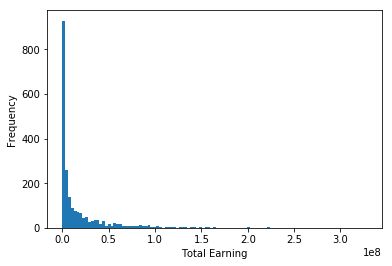

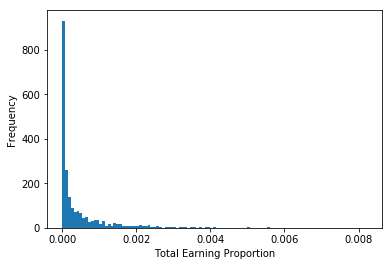

Note: Proportion and scale histogram appear similar. In fact, all three plots are similar.


In [39]:
# EDA of Total Earning DF

## Earning
print "Average Total Earning:", salaries_sorted_total["Total Earning"].mean()
print "Median Total Earning:", salaries_sorted_total["Total Earning"].median(), "- \
We can see from the difference from the median from the mean that we will \nhave a long tail"
print "Max Total Earning:", salaries_sorted_total["Total Earning"].max()
print "Min Total Earning:", salaries_sorted_total["Total Earning"].min()
print "$328,238,062 vs $2,706"
print 
print "Average Total Earning Proportion:", salaries_sorted_total["Total Earning Proportion"].mean()
print "Max Total Earning Percentage:", str(salaries_sorted_total["Total Earning Proportion"].max() * 100) + "%"

# Plot of Earning
plt.hist(salaries_sorted_total["Total Earning"], bins='auto')
plt.xlabel('Total Earning')
plt.ylabel('Frequency')
plt.show()


# Plot of Earning
plt.hist(salaries_sorted_total["Total Earning Proportion"], bins='auto')
plt.xlabel('Total Earning Proportion')
plt.ylabel('Frequency')
plt.show()
print "Note: Proportion and scale histogram appear similar. In fact, all three plots are similar."

## Can you guess who the biggest earner is?
Note: Multiply proportion by 100 to get correct percentage.

In [40]:
salaries_sorted_total.loc[salaries_sorted_total['Total Earning'].idxmax()]


Player                      Kobe Bryant
Total Earning                 328238062
Seasons Played                       19
Starting Age                         18
Retiring Age                         37
Total Earning Proportion     0.00821988
Total Earning Scale             82.1988
Name: 1214, dtype: object

Average Num of Seasons: 4.85111317254
Median Num of Season: 3.0 - We can see from the difference from the median from the mean that we will have 
a long tail
Max Num of Seasons: 21
Min Num of Seasons: 0


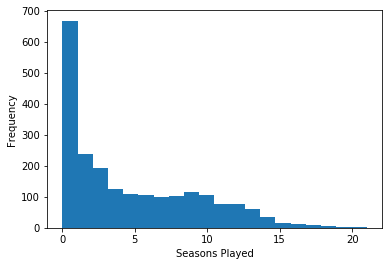

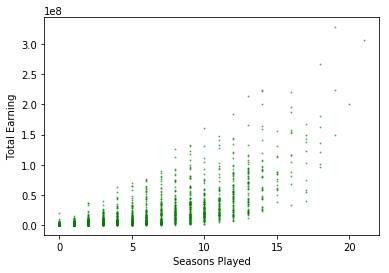

In [41]:
## Season
print "Average Num of Seasons:", salaries_sorted_total["Seasons Played"].mean() 
print "Median Num of Season:", salaries_sorted_total["Seasons Played"].median() , "- \
We can see from the difference from the median from the mean that we will have \na long tail"
print  "Max Num of Seasons:", salaries_sorted_total["Seasons Played"].max() 
print "Min Num of Seasons:", salaries_sorted_total["Seasons Played"].min()

# Plots of Season
plt.hist(salaries_sorted_total["Seasons Played"], bins='auto')
plt.xlabel('Seasons Played')
plt.ylabel('Frequency')
plt.show()
x = salaries_sorted_total['Seasons Played']
y = salaries_sorted_total["Total Earning"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Seasons Played')
plt.ylabel('Total Earning')
plt.show()

Average Starting Age: 23.3483302412
Median Starting Age: 23.0
Max Starting Age: 39
Min Starting Age: 17


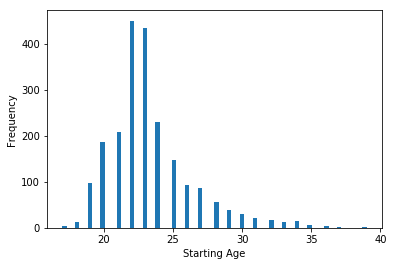

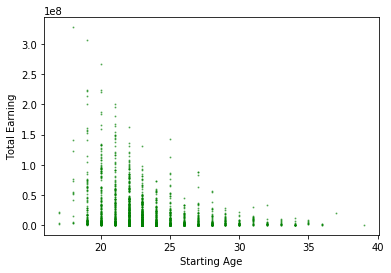

In [42]:
## Starting Age
print "Average Starting Age:", salaries_sorted_total["Starting Age"].mean() 
print "Median Starting Age:", salaries_sorted_total["Starting Age"].median() 
print "Max Starting Age:", salaries_sorted_total["Starting Age"].max()
print "Min Starting Age:", salaries_sorted_total["Starting Age"].min()

# Plot of Starting Age
plt.hist(salaries_sorted_total["Starting Age"], bins='auto')
plt.xlabel('Starting Age')
plt.ylabel('Frequency')
plt.show()
x = salaries_sorted_total["Starting Age"]
y = salaries_sorted_total["Total Earning"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Starting Age')
plt.ylabel('Total Earning')
plt.show()

Average Retiring Age: 28.1994434137
Median Retiring Age: 27.0
Max Retiring Age: 44
Min Retiring Age: 18


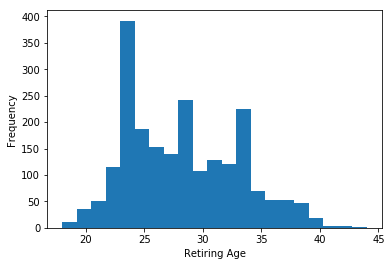

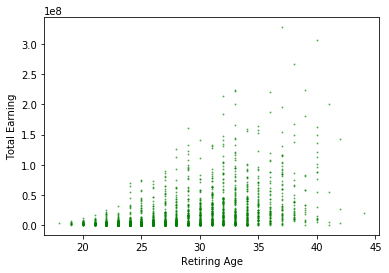

In [43]:
## Retiring Age
print "Average Retiring Age:", salaries_sorted_total["Retiring Age"].mean() 
print "Median Retiring Age:", salaries_sorted_total["Retiring Age"].median() 
print "Max Retiring Age:", salaries_sorted_total["Retiring Age"].max()
print "Min Retiring Age:", salaries_sorted_total["Retiring Age"].min()

# Plot of Retiring Age
plt.hist(salaries_sorted_total["Retiring Age"], bins='auto')
plt.xlabel('Retiring Age')
plt.ylabel('Frequency')
plt.show()
x = salaries_sorted_total["Retiring Age"]
y = salaries_sorted_total["Total Earning"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Retiring Age')
plt.ylabel('Total Earning')
plt.show()

RESULT: 

Average Total Earning in NBA is $18,516,084 

Median Total Earning is $4,534,480 (right tail)

Max is $328,238,062 (.82% of all total earnings of NBA players) Kobe earned that much above in 19 seasons.

NBA careers are short: Average Career Length is 4.8 years. Median Career Length is 3 years. They don’t have a long period of time to earn money.


INSIGHT:

Large contracts and careers are not the norm. Must play around the edges.


# EDA - Correlation with Total Earning

In [44]:
# Merge ATH Combine with Salaries Total
combine_merge_athletic = combine_athletic.merge(salaries_sorted_total, left_on='Player', right_on='Player', how= 'inner')
combine_merge_athletic.head()


,Unnamed: 0,Unnamed: 0.1,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),...,Hand (Width),Agility,Sprint,drafted,Total Earning,Seasons Played,Starting Age,Retiring Age,Total Earning Proportion,Total Earning Scale
0,0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,...,9.45,10.95,3.28,1,125976307,8,20,28,0.003155,31.547534
1,1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,...,9.28,11.15,3.18,1,6643560,2,22,24,0.000166,1.663709
2,2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,...,9.37,11.17,3.14,1,16000000,2,28,30,0.000401,4.006790
3,3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,...,9.47,11.12,3.27,1,16746078,6,24,30,0.000419,4.193626
4,4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,...,9.70,11.17,3.35,1,10377592,5,21,26,0.000260,2.598802


In [45]:
# Merge PHY Combine with Salaries Total
combine_merge_physical = combine_physical.merge(salaries_sorted_total, left_on='Player', right_on='Player', how= 'inner')
combine_merge_physical.head()

,Unnamed: 0,Unnamed: 0.1,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Weight,...,Hand (Length),Hand (Width),drafted,athletic,Total Earning,Seasons Played,Starting Age,Retiring Age,Total Earning Proportion,Total Earning Scale
0,0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,248.0,...,8.78,9.45,1,1,125976307,8,20,28,0.003155,31.547534
1,1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,213.0,...,8.58,9.28,1,1,6643560,2,22,24,0.000166,1.663709
2,2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,215.0,...,8.69,9.37,1,1,16000000,2,28,30,0.000401,4.006790
3,3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,234.0,...,8.81,9.47,1,1,16746078,6,24,30,0.000419,4.193626
4,4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,228.0,...,9.08,9.70,1,1,10377592,5,21,26,0.000260,2.598802


In [46]:
# Merge NBA Stat Combine with Salaries Total
nba_merge = draft_nba.merge(salaries_sorted_total, left_on='Player', right_on='Player', how= 'inner')
nba_merge.head()


,Unnamed: 0,Unnamed: 0.1,Draft_Yr,Pk,Tm,Player,College,Yrs,G,MP,...,WS_per_G,WS_per_48,BPM,VORP,Total Earning,Seasons Played,Starting Age,Retiring Age,Total Earning Proportion,Total Earning Scale
0,0,0,2009,1,LAC,Blake Griffin,University of Oklahoma,9,546,19154,...,69.1,0.173,4.0,28.9,125976307,8,20,28,0.003155,31.547534
1,1,1,2009,2,MEM,Hasheem Thabeet,University of Connecticut,5,224,2357,...,4.8,0.099,-1.4,0.4,16779840,4,22,26,0.000420,4.202080
2,2,2,2009,3,OKC,James Harden,Arizona State University,10,703,23837,...,108.8,0.219,6.6,51.4,111989471,8,20,28,0.002804,28.044890
3,3,3,2009,4,SAC,Tyreke Evans,University of Memphis,10,544,17237,...,28.4,0.079,1.0,13.2,63136251,8,20,28,0.001581,15.810854
4,4,4,2009,5,MIN,Ricky Rubio,International,8,451,14087,...,29.0,0.099,1.2,11.5,56484046,6,21,27,0.001414,14.144980


In [47]:
# Merge NCAA stat with Salaries Total
ncaa_merge = draft_ncaa.merge(salaries_sorted_total, left_on='Name', right_on='Player', how= 'inner')
ncaa_merge.head()

,Unnamed: 0,Name,School,Conf,Season,SOS,G,GS,MP,PTS,...,3P,3PA,3P%,Player,Total Earning,Seasons Played,Starting Age,Retiring Age,Total Earning Proportion,Total Earning Scale
0,2,Blake Griffin,Oklahoma,Big 12,Career,7.37,68,63,30.9,18.8,...,0.0,0.1,0.300,Blake Griffin,125976307,8,20,28,0.003155,31.547534
1,6,Hasheem Thabeet,UConn,Big East,Career,7.14,100,99,29.3,10.3,...,0.0,0.0,0.000,Hasheem Thabeet,16779840,4,22,26,0.000420,4.202080
2,9,James Harden,Arizona State,Pac-10,Career,7.05,69,68,35.0,19.0,...,1.5,3.9,0.376,James Harden,111989471,8,20,28,0.002804,28.044890
3,11,Tyreke Evans,Memphis,CUSA,Career,4.63,37,35,29.0,17.1,...,0.9,3.4,0.274,Tyreke Evans,63136251,8,20,28,0.001581,15.810854
4,14,Jonny Flynn,Syracuse,Big East,Career,8.72,73,73,36.5,16.6,...,1.4,4.2,0.333,Jonny Flynn,9576000,2,20,22,0.000240,2.398064


In [48]:
# Salary Correlation with Athletic Combine
combine_merge_athletic.corr().iloc[-6,2:-2]

Year                       -0.436203
Draft pick                 -0.428325
Height (No Shoes)           0.062944
Height (With Shoes)         0.060321
Wingspan                    0.026937
Standing reach              0.069533
Vertical (Max)             -0.053953
Vertical (Max Reach)        0.035081
Vertical (No Step)         -0.036249
Vertical (No Step Reach)    0.048908
Weight                      0.085748
Body Fat                    0.012118
Hand (Length)               0.028997
Hand (Width)                0.107001
Agility                    -0.092932
Sprint                     -0.122495
drafted                     0.179005
Total Earning               1.000000
Seasons Played              0.725956
Starting Age               -0.244992
Retiring Age                0.502650
Name: Total Earning, dtype: float64

In [49]:
# Create correlation df
combine_merge_athletic_corr = combine_merge_athletic.corr().iloc[-6,2:-2]
print type(combine_merge_athletic_corr)
print
print combine_merge_athletic_corr.head()

<class 'pandas.core.series.Series'>

Year                  -0.436203
Draft pick            -0.428325
Height (No Shoes)      0.062944
Height (With Shoes)    0.060321
Wingspan               0.026937
Name: Total Earning, dtype: float64


In [50]:
for i in range(0, len(combine_merge_athletic_corr)):
    if np.absolute(combine_merge_athletic_corr[i]) > .4 and np.absolute(combine_merge_athletic_corr[i])< 1 :
        print combine_merge_athletic_corr.index.values[i], "vs Total Earning"
        print combine_merge_athletic_corr[i]
        print

Year vs Total Earning
-0.4362027239324325

Draft pick vs Total Earning
-0.4283246328353862

Seasons Played vs Total Earning
0.7259564236071218

Retiring Age vs Total Earning
0.5026504163052802



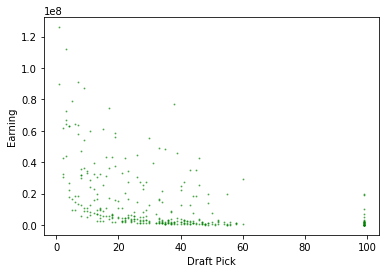

In [51]:
x = combine_merge_athletic['Draft pick']
y = combine_merge_athletic["Total Earning"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Draft Pick')
plt.ylabel('Earning')
plt.show()

Not much useful information here.

In [52]:
# Salary Correlation with Physical Combine
# Remove already used variables
combine_merge_physical.corr().iloc[-6,4:-6]

Height (No Shoes)      0.050983
Height (With Shoes)    0.048063
Wingspan               0.023687
Standing reach         0.055666
Weight                 0.063138
Body Fat              -0.017489
Hand (Length)          0.012201
Hand (Width)           0.075234
drafted                0.179560
athletic               0.068026
Name: Total Earning, dtype: float64

In [53]:
# Create correlation df
combine_merge_physical_corr = combine_merge_physical.corr().iloc[-6,4:-6]
print type(combine_merge_physical_corr)
print
print combine_merge_physical_corr.head()

<class 'pandas.core.series.Series'>

Height (No Shoes)      0.050983
Height (With Shoes)    0.048063
Wingspan               0.023687
Standing reach         0.055666
Weight                 0.063138
Name: Total Earning, dtype: float64


In [54]:
# Show correlation above 15%
for i in range(0, len(combine_merge_physical_corr)):
    if np.absolute(combine_merge_physical_corr[i]) > .15 and np.absolute(combine_merge_physical_corr[i])< 1 :
        print combine_merge_physical_corr.index.values[i], "vs Total Earning"
        print combine_merge_physical_corr[i]


drafted vs Total Earning
0.17955988495635272


Nothing useful.

In [55]:
#Salary Correlation with NBA Stats
# Scorers earn more money!
nba_merge.corr().iloc[-6, 2:-5]

Draft_Yr        -0.434133
Pk              -0.435252
Yrs              0.768789
G                0.803433
MP               0.887654
PTS              0.903735
TRB              0.799510
AST              0.753020
FG_Perc          0.182157
3P_Perc          0.178605
FT_Perc          0.172623
MP.1             0.887654
PTS_per_G        0.680327
TRB_per_G        0.511399
AST_per_G        0.495763
WS_per_G         0.883875
WS_per_48        0.374355
BPM              0.484377
VORP             0.786132
Total Earning    1.000000
Name: Total Earning, dtype: float64

In [56]:
# Create correlation df
nba_merge_corr = nba_merge.corr().iloc[-6,2:-5]
print type(nba_merge_corr)
print
print nba_merge_corr.head()

<class 'pandas.core.series.Series'>

Draft_Yr   -0.434133
Pk         -0.435252
Yrs         0.768789
G           0.803433
MP          0.887654
Name: Total Earning, dtype: float64


In [57]:
# Show correlation is above 70%
for i in range(0, len(nba_merge_corr)):
    if np.absolute(nba_merge_corr[i]) > .7 and np.absolute(nba_merge_corr[i])< 1 :
        print nba_merge_corr.index.values[i], "vs Total Earning"
        print nba_merge_corr[i]


Yrs vs Total Earning
0.7687892405935352
G vs Total Earning
0.8034330522056558
MP vs Total Earning
0.8876539771782866
PTS vs Total Earning
0.9037352726216877
TRB vs Total Earning
0.7995095702920395
AST vs Total Earning
0.7530201431564645
MP.1 vs Total Earning
0.8876539771782866
WS_per_G vs Total Earning
0.8838752288752407
VORP vs Total Earning
0.7861321181501126


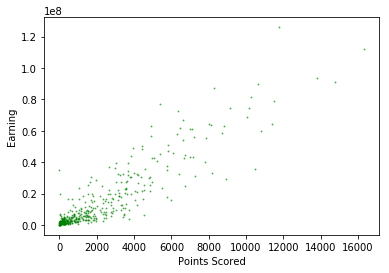

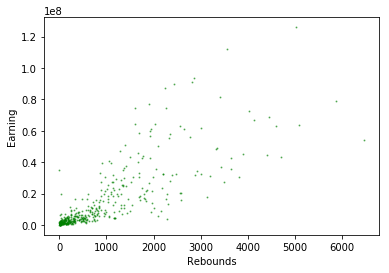

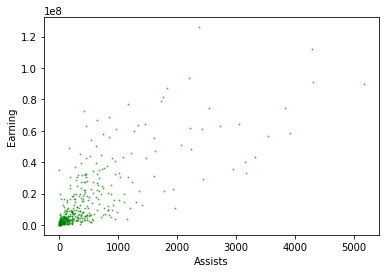

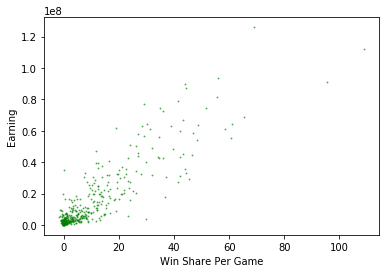

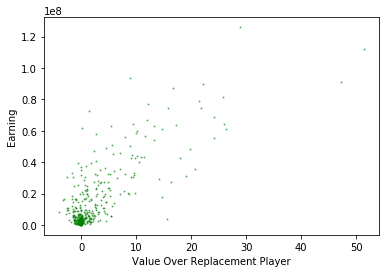

'\nValue Over Replacement Player - https://www.basketball-reference.com/about/bpm.html#vorp\n\nA box score estimate of the points per 100 TEAM possessions that a player contributed\nabove a replacement-level player, translated to an average team and prorated to an 82-game season.\n\nThe formula can be found in link above.\n\n'

In [58]:
# Graphs by Stats

# PTS vs Total Earning
x = nba_merge['PTS']
y = nba_merge["Total Earning"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Points Scored')
plt.ylabel('Earning')
plt.show()

# TRB vs Total Earning
x = nba_merge['TRB']
y = nba_merge["Total Earning"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Rebounds')
plt.ylabel('Earning')
plt.show()

# AST vs Total Earning
x = nba_merge['AST']
y = nba_merge["Total Earning"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Assists')
plt.ylabel('Earning')
plt.show()


# WS Per G vs Total Earning
x = nba_merge['WS_per_G']
y = nba_merge["Total Earning"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Win Share Per Game')
plt.ylabel('Earning')
plt.show()

"""
Win Shares - https://www.basketball-reference.com/about/ws.html

An estimate of the number of wins contributed by a player

For offensive win shares
1. Calculate points produced for each player. 
2. Calculate offensive possessions for each player. 
3. Calculate marginal offense for each player
4. Calculate marginal points per win

For defense win shares
1. Calculate the Defensive Rating for each player. 
2. Calculate marginal defense for each player. 
3. Calculate marginal points per win. 
4. Credit Defensive Win Shares to the players. 

The formula can be found in link above.

"""

# VORP vs Total Earning
x = nba_merge['VORP']
y = nba_merge["Total Earning"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Value Over Replacement Player')
plt.ylabel('Earning')
plt.show()

"""
Value Over Replacement Player - https://www.basketball-reference.com/about/bpm.html#vorp

A box score estimate of the points per 100 TEAM possessions that a player contributed
above a replacement-level player, translated to an average team and prorated to an 82-game season.

The formula can be found in link above.

"""

In [59]:
#Salary Correlation with NCAA Stats
# NCAA is not as strong as predictor, but it shows that the NBA pays for scorers in general.
ncaa_merge.corr().iloc[-6, 1:-6]

SOS   -0.026682
G     -0.127709
GS    -0.070581
MP     0.164158
PTS    0.191098
DRB    0.144916
ORB    0.120048
TRB    0.145500
AST    0.059341
STL    0.200831
BLK    0.023086
TOV    0.209578
PF     0.072197
FG     0.185436
FGA    0.135668
FG%    0.058966
FT     0.197192
FTA    0.215608
FT%    0.000542
2P     0.177718
2PA    0.147182
2P%    0.095726
3P     0.029203
3PA    0.034118
3P%    0.017834
Name: Total Earning, dtype: float64

In [60]:
# Create correlation df
ncaa_merge_corr = ncaa_merge.corr().iloc[-6,2:-5]
print type(ncaa_merge_corr)
print
print ncaa_merge_corr.head()

<class 'pandas.core.series.Series'>

G     -0.127709
GS    -0.070581
MP     0.164158
PTS    0.191098
DRB    0.144916
Name: Total Earning, dtype: float64


In [61]:
# Show correlation that is above 15%
for i in range(0, len(ncaa_merge_corr)):
    if np.absolute(ncaa_merge_corr[i]) > .15 and np.absolute(ncaa_merge_corr[i])< 1 :
        print ncaa_merge_corr.index.values[i], "vs Total Earning"
        print ncaa_merge_corr[i]


MP vs Total Earning
0.16415821664868602
PTS vs Total Earning
0.19109754935071058
STL vs Total Earning
0.20083079707702672
TOV vs Total Earning
0.209578156601079
FG vs Total Earning
0.18543605193309892
FT vs Total Earning
0.19719176300141983
FTA vs Total Earning
0.2156084063438282
2P vs Total Earning
0.17771801131250772


Seems to favor scorers and playmakers overall.

For the NCAA, it seems if anyone who is a playmaker or a scorer is valued. It basically confirms positional preference.


# Inferential Linear Regression of Total Earning vs Career NBA Stats

In [62]:
# Merge NBA Stat with Salaries Total df
nba_salary_total = draft_nba.merge(salaries_sorted_total, left_on='Player', right_on='Player', how= 'inner')
nba_salary_total.head()


,Unnamed: 0,Unnamed: 0.1,Draft_Yr,Pk,Tm,Player,College,Yrs,G,MP,...,WS_per_G,WS_per_48,BPM,VORP,Total Earning,Seasons Played,Starting Age,Retiring Age,Total Earning Proportion,Total Earning Scale
0,0,0,2009,1,LAC,Blake Griffin,University of Oklahoma,9,546,19154,...,69.1,0.173,4.0,28.9,125976307,8,20,28,0.003155,31.547534
1,1,1,2009,2,MEM,Hasheem Thabeet,University of Connecticut,5,224,2357,...,4.8,0.099,-1.4,0.4,16779840,4,22,26,0.000420,4.202080
2,2,2,2009,3,OKC,James Harden,Arizona State University,10,703,23837,...,108.8,0.219,6.6,51.4,111989471,8,20,28,0.002804,28.044890
3,3,3,2009,4,SAC,Tyreke Evans,University of Memphis,10,544,17237,...,28.4,0.079,1.0,13.2,63136251,8,20,28,0.001581,15.810854
4,4,4,2009,5,MIN,Ricky Rubio,International,8,451,14087,...,29.0,0.099,1.2,11.5,56484046,6,21,27,0.001414,14.144980


In [63]:
# Find appropriate columns to regress on for inferential statistics.
i = -1

for name in nba_salary_total:
    i += 1
    print str(i) + " : " + name

0 : Unnamed: 0
1 : Unnamed: 0.1
2 : Draft_Yr
3 : Pk
4 : Tm
5 : Player
6 : College
7 : Yrs
8 : G
9 : MP
10 : PTS
11 : TRB
12 : AST
13 : FG_Perc
14 : 3P_Perc
15 : FT_Perc
16 : MP.1
17 : PTS_per_G
18 : TRB_per_G
19 : AST_per_G
20 : WS_per_G
21 : WS_per_48
22 : BPM
23 : VORP
24 : Total Earning
25 : Seasons Played
26 : Starting Age
27 : Retiring Age
28 : Total Earning Proportion
29 : Total Earning Scale


In [64]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

# Set the X and y for linear regression
X = nba_salary_total.drop(["Total Earning", "PTS_per_G", "TRB_per_G", "AST_per_G"], axis = 1).iloc[:, 9:16]
y = nba_salary_total.iloc[:, 24]

# Fit the model to X and y
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:          Total Earning   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     325.3
Date:                Tue, 04 Dec 2018   Prob (F-statistic):          5.84e-167
Time:                        12:51:16   Log-Likelihood:                -7541.0
No. Observations:                 436   AIC:                         1.510e+04
Df Residuals:                     428   BIC:                         1.513e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.323e+06   2.52e+06      2.909      0.0

The linear regression above explains 84.2% of the variance in the data after removing several variables.

Assuming ceteris paribus or holding all other coefficients fixed...

For every point scored, $4,748 is earned. 

For every rebound, $4,375 is earned.

For every assist, $2,115 is earned.

For every minute played, $206.


Box score stats still drive perceived value creation. The remaining variance may be captured by market inefficiencies (players outperforming contracts they signed previously) as well as value that box score can’t capture

# EDA - Peak Salary of Players

In [65]:
# Find maximum salary. How many years to get the maximum salary? What season?

# Declare dataframe for maximum salary info
salaries_sorted_max = pd.DataFrame()

# Declare parameters
j = -1 
maxSalary = 0
maxSeason = 0
maxAge = 0
minAge = salaries_sorted.iloc[0, -1]

# For loop to fill in dataframe
for i in range(0, len(salaries_sorted)):  
    player_name = salaries_sorted.iloc[i, 1]
    salary = salaries_sorted.iloc[i, 2]
    season = salaries_sorted.iloc[i, 4]
    age = salaries_sorted.iloc[i, -1]
    
    # Will iterate until new player name found in row before creating new row for the player beforehand
    if player_name != salaries_sorted.iloc[i - 1, 1] or i == (len(salaries_sorted) - 1):
        j += 1
        salaries_sorted_max.loc[j, 'Player'] = salaries_sorted.iloc[i - 1, 1]
        salaries_sorted_max.loc[j, 'Max Salary'] = maxSalary
        salaries_sorted_max.loc[j, 'Season'] = maxSeason
        salaries_sorted_max.loc[j, 'Seasons Played'] = maxAge - minAge
        salaries_sorted_max.loc[j, 'Age'] = maxAge
        maxSalary = 0
        maxSeason = 0
        maxAge = 0
        minAge = salaries_sorted.iloc[i, -1]
    
    # Update maximum salary if higher salary is found for a player
    # Must place after previous in case we identify a row with a different player name
    # if we do an "else", it will skip this block of code.
    if maxSalary < salary:
        maxSalary = salary
        maxSeason = season
        maxAge = age
       
# Set to proper data type
salaries_sorted_max.loc[:,'Max Salary':'Age'] = salaries_sorted_max.loc[:,'Max Salary':'Age'].astype(int)

# Drop first row.
salaries_sorted_max = salaries_sorted_max.drop([0])
salaries_sorted_max.head()

# Display Results
print "Completed"
print salaries_sorted_max.head()
print salaries_sorted_max.tail()

Completed
          Player  Max Salary  Season  Seasons Played  Age
1     A.C. Green     6473000    1995               5   32
2  A.J. Bramlett      118974    1999               0   22
3   A.J. English      406000    1992               2   25
4    A.J. Guyton      465850    2001               1   23
5   A.J. Hammons     1312611    2017               1   25
                  Player  Max Salary  Season  Seasons Played  Age
2152     Zendon Hamilton      807546    2004               4   29
2153             Zhou Qi      815615    2017               0   21
2154        Zoran Dragic     2050397    2015               1   26
2155      Zoran Planinic     1127280    2005               2   23
2156  Zydrunas Ilgauskas    14625000    2004               8   29


In [66]:
# Sort by Player
salaries_sorted_max = salaries_sorted_max.sort_values(['Player'])
salaries_sorted_max.head()

,Player,Max Salary,Season,Seasons Played,Age
1,A.C. Green,6473000,1995,5,32
2,A.J. Bramlett,118974,1999,0,22
3,A.J. English,406000,1992,2,25
4,A.J. Guyton,465850,2001,1,23
5,A.J. Hammons,1312611,2017,1,25


In [67]:
# Find total salaries paid in the NBA per year based on START SEASON

yearly_totals = {}
for i in range(len(salaries)):
    year = clean_salaries['season_start'][i]
    if year in yearly_totals.keys():
        yearly_totals[year] += clean_salaries['salary'][i]
    else:
        yearly_totals[year] = clean_salaries['salary'][i]

# Calculate each player's MAX salary as a proportion of that year's total league-wide salaries.
salaries_sorted_max['Max Salary Proportion'] = 0.0

for i in range(1, len(salaries_sorted_max)):
    year = salaries_sorted_max.loc[i, 'Season']
    salaries_sorted_max.loc[i, 'Max Salary Proportion'] = salaries_sorted_max.loc[i, 'Max Salary'] / yearly_totals[year]
  

In [68]:
# Scale the numbers - used 10,000 as a factor for interpretability (it keeps the values mostly between 0 and 100)
salaries_sorted_max['Max Salary Scale'] = salaries_sorted_max['Max Salary Proportion'].map(lambda s: s*10000)
salaries_sorted_max.head()

,Player,Max Salary,Season,Seasons Played,Age,Max Salary Proportion,Max Salary Scale
1,A.C. Green,6473000,1995,5,32,0.010572,105.724268
2,A.J. Bramlett,118974,1999,0,22,0.000143,1.434130
3,A.J. English,406000,1992,2,25,0.001049,10.490219
4,A.J. Guyton,465850,2001,1,23,0.000306,3.055704
5,A.J. Hammons,1312611,2017,1,25,0.000394,3.937099


Average Max Salary: 3982611.42347
Median Max Salary: 1619340.0 - We can see from the difference from the median from the mean that we will have 
a long tail
Average Max Salary Proportion: 0.00233955613802
Average Max Salary Scale: 23.3955613802
Max Max Salary: 34682550
Min Max Salary: 2706
$34,682,550 vs $2,706


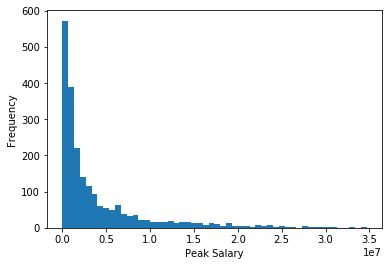

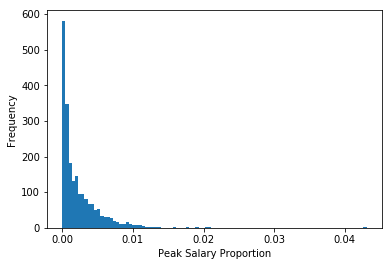

Note: Proportion and scale histogram appear similar. They appear even more drastic.


In [69]:
# EDA of Max Salary DF

## Salary
print "Average Max Salary:", salaries_sorted_max["Max Salary"].mean()
print "Median Max Salary:", salaries_sorted_max["Max Salary"].median(), "- \
We can see from the difference from the median from the mean that we will have \na long tail"
print "Average Max Salary Proportion:", salaries_sorted_max["Max Salary Proportion"].mean()
print "Average Max Salary Scale:", salaries_sorted_max["Max Salary Scale"].mean()
print "Max Max Salary:", salaries_sorted_max["Max Salary"].max()
print "Min Max Salary:", salaries_sorted_max["Max Salary"].min()
print "$34,682,550 vs $2,706"

# Plot of Salary
plt.hist(salaries_sorted_max["Max Salary"], bins='auto')
plt.xlabel('Peak Salary')
plt.ylabel('Frequency')
plt.show()
plt.hist(salaries_sorted_max["Max Salary Proportion"], bins='auto')
plt.xlabel('Peak Salary Proportion')
plt.ylabel('Frequency')
plt.show()
print "Note: Proportion and scale histogram appear similar. They appear even more drastic."

Average Num of Seasons: 3.64888682746
Median Num of Season: 2.0 - We can see from the difference from the median from the mean that we will have 
a long tail
Max Num of Seasons: 18
Min Num of Seasons: 0


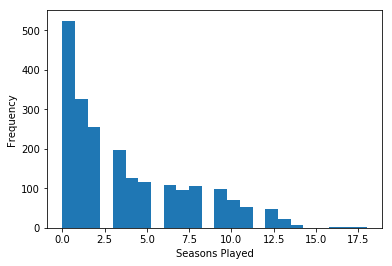

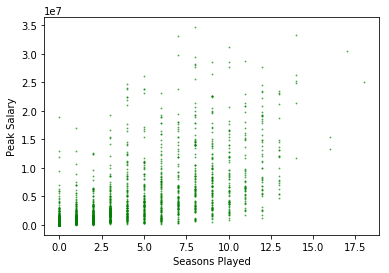

In [70]:
## Seasons Until Peak Salary

print "Average Num of Seasons:", salaries_sorted_max["Seasons Played"].mean() 
print "Median Num of Season:", salaries_sorted_max["Seasons Played"].median() , "- \
We can see from the difference from the median from the mean that we will have \na long tail"
print  "Max Num of Seasons:", salaries_sorted_max["Seasons Played"].max() 
print "Min Num of Seasons:", salaries_sorted_max["Seasons Played"].min()

# Plots of Season
plt.hist(salaries_sorted_max["Seasons Played"], bins='auto')
plt.xlabel('Seasons Played')
plt.ylabel('Frequency')
plt.show()
x = salaries_sorted_max['Seasons Played']
y = salaries_sorted_max["Max Salary"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Seasons Played')
plt.ylabel('Peak Salary')
plt.show()
print 


Average Age: 26.9972170686
Median Age: 26.0
Max Age: 42
Min Age: 17


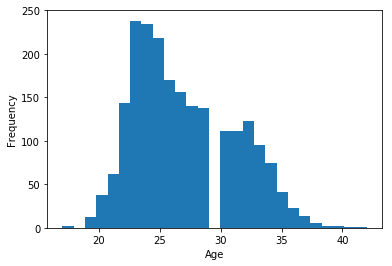

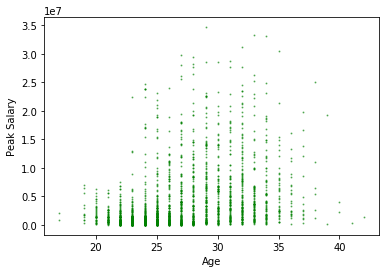

In [71]:
## Age Until Peak Salary
print "Average Age:", salaries_sorted_max.Age.mean() 
print "Median Age:", salaries_sorted_max.Age.median() 
print "Max Age:", salaries_sorted_max.Age.max()
print "Min Age:", salaries_sorted_max.Age.min()

# Plot of Age
plt.hist(salaries_sorted_max["Age"], bins='auto')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
x = salaries_sorted_max['Age']
y = salaries_sorted_max["Max Salary"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('Age')
plt.ylabel('Peak Salary')
plt.show()

Again, data seems long-tailed where median is less than the mean.

Average Peak Salary is $3,982,611

Median Peak Salary is $1,619,340

It takes on average 3.6 years to hit peak salary. At 27ish years old

For the median, only 2 years to hit peak salary!  At 26 years old

# EDA - NBA-NCAA Correlation

In [72]:
# Force all columns in a df to have a suffix, not just shared columns between merged dfs.
draft_nba.columns = draft_nba.columns.map(lambda x: str(x) + '_nba')
draft_ncaa.columns = draft_ncaa.columns.map(lambda x: str(x) + '_ncaa')

# Merge NBA and NCAA stats for analysis
nba_ncaa = draft_ncaa.merge(draft_nba, left_on='Name_ncaa', right_on='Player_nba', how= 'inner')
nba_ncaa.head()

,Unnamed: 0_ncaa,Name_ncaa,School_ncaa,Conf_ncaa,Season_ncaa,SOS_ncaa,G_ncaa,GS_ncaa,MP_ncaa,PTS_ncaa,...,3P_Perc_nba,FT_Perc_nba,MP.1_nba,PTS_per_G_nba,TRB_per_G_nba,AST_per_G_nba,WS_per_G_nba,WS_per_48_nba,BPM_nba,VORP_nba
0,2,Blake Griffin,Oklahoma,Big 12,Career,7.37,68,63,30.9,18.8,...,0.333,0.685,19154,21.6,9.2,4.3,69.1,0.173,4.0,28.9
1,6,Hasheem Thabeet,UConn,Big East,Career,7.14,100,99,29.3,10.3,...,0.000,0.578,2357,2.2,2.7,0.1,4.8,0.099,-1.4,0.4
2,9,James Harden,Arizona State,Pac-10,Career,7.05,69,68,35.0,19.0,...,0.364,0.853,23837,23.2,5.1,6.1,108.8,0.219,6.6,51.4
3,11,Tyreke Evans,Memphis,CUSA,Career,4.63,37,35,29.0,17.1,...,0.321,0.759,17237,16.3,4.7,5.0,28.4,0.079,1.0,13.2
4,14,Jonny Flynn,Syracuse,Big East,Career,8.72,73,73,36.5,16.6,...,0.338,0.809,3738,9.2,1.9,3.9,-1.1,-0.015,-4.9,-2.7


In [73]:
# Create Correlation Matrix
nba_ncaa.corr().iloc[1:26,28:]

,Draft_Yr_nba,Pk_nba,Yrs_nba,G_nba,MP_nba,PTS_nba,TRB_nba,AST_nba,FG_Perc_nba,3P_Perc_nba,FT_Perc_nba,MP.1_nba,PTS_per_G_nba,TRB_per_G_nba,AST_per_G_nba,WS_per_G_nba,WS_per_48_nba,BPM_nba,VORP_nba
SOS_ncaa,0.166669,-0.181541,-0.031093,-0.002912,0.013971,-0.004927,0.007323,-0.018200,0.056621,0.023176,0.063715,0.013971,0.072448,0.080116,0.028441,-0.040152,0.001495,-0.003238,-0.061114
G_ncaa,-0.199705,0.469263,-0.104823,-0.100870,-0.154562,-0.183333,-0.155158,-0.133181,-0.189572,-0.132809,-0.161293,-0.154562,-0.313766,-0.291705,-0.212708,-0.115728,-0.088928,-0.037752,-0.096388
GS_ncaa,-0.191275,0.384523,-0.050768,-0.047881,-0.090869,-0.108985,-0.110313,-0.066746,-0.175557,-0.070387,-0.104396,-0.090869,-0.233274,-0.248091,-0.124315,-0.056798,-0.069858,-0.025965,-0.060790
MP_ncaa,-0.026526,-0.151999,0.167145,0.178145,0.201447,0.201482,0.070657,0.233052,-0.045170,0.333305,0.139514,0.201447,0.219429,-0.006299,0.346479,0.147230,-0.015707,0.066047,0.114128
PTS_ncaa,-0.037763,-0.236766,0.175817,0.189615,0.220996,0.271237,0.097887,0.249380,-0.017190,0.338554,0.197293,0.220996,0.328409,0.056874,0.321058,0.200053,0.002074,0.043795,0.167491
DRB_ncaa,0.016750,-0.235312,0.091996,0.093525,0.087577,0.079286,0.286932,-0.038330,0.148545,-0.083267,-0.043091,0.087577,0.105316,0.422846,-0.059600,0.164765,0.243767,0.209933,0.173222
ORB_ncaa,-0.127301,-0.131643,0.091304,0.103075,0.074898,0.055277,0.330644,-0.136036,0.178259,-0.294540,-0.131419,0.074898,0.039343,0.438320,-0.266299,0.149915,0.301439,0.220210,0.119491
TRB_ncaa,-0.045105,-0.210670,0.100538,0.106529,0.090551,0.076121,0.330480,-0.082863,0.174391,-0.181144,-0.084766,0.090551,0.086383,0.465761,-0.152470,0.173126,0.287812,0.231074,0.164842
AST_ncaa,0.028451,-0.064706,0.075289,0.075347,0.118508,0.126521,-0.068296,0.349706,-0.067763,0.303032,0.167386,0.118508,0.168231,-0.139127,0.615722,0.049451,-0.135367,-0.027449,0.086150
STL_ncaa,-0.071834,-0.176549,0.217379,0.226719,0.278055,0.277108,0.102289,0.386379,-0.003823,0.285382,0.192895,0.278055,0.284354,0.009414,0.512203,0.220475,0.013188,0.161688,0.256427


In [74]:
# Create correlation df
nba_ncaa_corr = nba_ncaa.corr().iloc[1:26,28:]
print type(nba_ncaa_corr)
print
print nba_ncaa_corr.head()


<class 'pandas.core.frame.DataFrame'>

          Draft_Yr_nba    Pk_nba   Yrs_nba     G_nba    MP_nba   PTS_nba  \
SOS_ncaa      0.166669 -0.181541 -0.031093 -0.002912  0.013971 -0.004927   
G_ncaa       -0.199705  0.469263 -0.104823 -0.100870 -0.154562 -0.183333   
GS_ncaa      -0.191275  0.384523 -0.050768 -0.047881 -0.090869 -0.108985   
MP_ncaa      -0.026526 -0.151999  0.167145  0.178145  0.201447  0.201482   
PTS_ncaa     -0.037763 -0.236766  0.175817  0.189615  0.220996  0.271237   

           TRB_nba   AST_nba  FG_Perc_nba  3P_Perc_nba  FT_Perc_nba  MP.1_nba  \
SOS_ncaa  0.007323 -0.018200     0.056621     0.023176     0.063715  0.013971   
G_ncaa   -0.155158 -0.133181    -0.189572    -0.132809    -0.161293 -0.154562   
GS_ncaa  -0.110313 -0.066746    -0.175557    -0.070387    -0.104396 -0.090869   
MP_ncaa   0.070657  0.233052    -0.045170     0.333305     0.139514  0.201447   
PTS_ncaa  0.097887  0.249380    -0.017190     0.338554     0.197293  0.220996   

          PTS_per

In [75]:
# Select correlation that is above 40%
for i in range(0, len(nba_ncaa_corr)):
    for j in range(0, len(nba_ncaa_corr.columns)):
        if np.absolute(nba_ncaa_corr.iloc[i, j]) > .4:
            print nba_ncaa_corr.index.values[i], "vs", nba_ncaa_corr.columns.values[j]
            print nba_ncaa_corr.iloc[i, j]
            print

G_ncaa vs Pk_nba
0.46926264587108263

DRB_ncaa vs TRB_per_G_nba
0.4228461985842412

ORB_ncaa vs TRB_per_G_nba
0.4383202649827347

TRB_ncaa vs TRB_per_G_nba
0.4657614615969946

AST_ncaa vs AST_per_G_nba
0.6157224069377848

STL_ncaa vs AST_per_G_nba
0.5122030819746434

TOV_ncaa vs AST_per_G_nba
0.45351291420250894

FT%_ncaa vs 3P_Perc_nba
0.4293508260745277

3P_ncaa vs 3P_Perc_nba
0.4026552781270942

3PA_ncaa vs 3P_Perc_nba
0.42649372968860244



In [76]:
# Select correlation that is above 60%
for i in range(0, len(nba_ncaa_corr)):
    for j in range(0, len(nba_ncaa_corr.columns)):
        if np.absolute(nba_ncaa_corr.iloc[i, j]) > .5:
            print nba_ncaa_corr.index.values[i], "vs", nba_ncaa_corr.columns.values[j]
            print nba_ncaa_corr.iloc[i, j]
            print

AST_ncaa vs AST_per_G_nba
0.6157224069377848

STL_ncaa vs AST_per_G_nba
0.5122030819746434



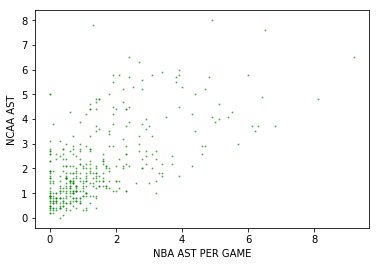

In [77]:
# Graph of NCAA AST vs NBA AST per Game
x = nba_ncaa['AST_per_G_nba']
y = nba_ncaa["AST_ncaa"]
plt.scatter(x, y, c="g", alpha=0.5, s=1)
plt.xlabel('NBA AST PER GAME')
plt.ylabel('NCAA AST')
plt.show()

Assist in NCAA translate well to Assists per game in NBA

Steals in NCAA translate well to Assists per game in NBA.

3-point shooters seem to translate relatively well.

Rebounds in NCAA translate well to Rebounds in NBA.


# Inferential Linear Regression of NBA Pick vs NCAA Stats Only

In [78]:
# https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [79]:
# Find appropriate columns to regress on for inferential statistics.
i = -1

for name in nba_ncaa:
    i += 1
    print str(i) + " : " + name

0 : Unnamed: 0_ncaa
1 : Name_ncaa
2 : School_ncaa
3 : Conf_ncaa
4 : Season_ncaa
5 : SOS_ncaa
6 : G_ncaa
7 : GS_ncaa
8 : MP_ncaa
9 : PTS_ncaa
10 : DRB_ncaa
11 : ORB_ncaa
12 : TRB_ncaa
13 : AST_ncaa
14 : STL_ncaa
15 : BLK_ncaa
16 : TOV_ncaa
17 : PF_ncaa
18 : FG_ncaa
19 : FGA_ncaa
20 : FG%_ncaa
21 : FT_ncaa
22 : FTA_ncaa
23 : FT%_ncaa
24 : 2P_ncaa
25 : 2PA_ncaa
26 : 2P%_ncaa
27 : 3P_ncaa
28 : 3PA_ncaa
29 : 3P%_ncaa
30 : Unnamed: 0_nba
31 : Unnamed: 0.1_nba
32 : Draft_Yr_nba
33 : Pk_nba
34 : Tm_nba
35 : Player_nba
36 : College_nba
37 : Yrs_nba
38 : G_nba
39 : MP_nba
40 : PTS_nba
41 : TRB_nba
42 : AST_nba
43 : FG_Perc_nba
44 : 3P_Perc_nba
45 : FT_Perc_nba
46 : MP.1_nba
47 : PTS_per_G_nba
48 : TRB_per_G_nba
49 : AST_per_G_nba
50 : WS_per_G_nba
51 : WS_per_48_nba
52 : BPM_nba
53 : VORP_nba


In [80]:
# Select only relevant variables
draft_ncaa_reg = nba_ncaa.iloc[:,5:34]
draft_ncaa_reg = draft_ncaa_reg.drop(["Unnamed: 0_nba", "Unnamed: 0.1_nba", "MP_ncaa", "Draft_Yr_nba", "DRB_ncaa", "ORB_ncaa", "G_ncaa"], axis = 1)

draft_ncaa_reg.head()

,SOS_ncaa,GS_ncaa,PTS_ncaa,TRB_ncaa,AST_ncaa,STL_ncaa,BLK_ncaa,TOV_ncaa,PF_ncaa,FG_ncaa,...,FT_ncaa,FTA_ncaa,FT%_ncaa,2P_ncaa,2PA_ncaa,2P%_ncaa,3P_ncaa,3PA_ncaa,3P%_ncaa,Pk_nba
0,7.37,63,18.8,11.8,2.1,1.1,1.0,2.8,2.5,7.1,...,4.5,7.7,0.589,7.1,11.4,0.622,0.0,0.1,0.300,1
1,7.14,99,10.3,8.5,0.4,0.4,4.2,1.8,2.6,3.6,...,3.1,5.0,0.625,3.6,5.9,0.611,0.0,0.0,0.000,2
2,7.05,68,19.0,5.4,3.7,1.9,0.4,3.0,2.5,6.0,...,5.4,7.2,0.755,4.6,8.0,0.570,1.5,3.9,0.376,3
3,4.63,35,17.1,5.4,3.9,2.1,0.8,3.6,2.4,6.2,...,3.7,5.2,0.711,5.3,10.3,0.514,0.9,3.4,0.274,4
4,8.72,73,16.6,2.7,6.0,1.5,0.2,3.1,1.5,5.6,...,4.0,5.1,0.782,4.2,8.1,0.525,1.4,4.2,0.333,6


In [81]:
# Find appropriate columns to regress on for inferential statistics.
i = -1

for name in nba_ncaa:
    i += 1
    print str(i) + " : " + name

0 : Unnamed: 0_ncaa
1 : Name_ncaa
2 : School_ncaa
3 : Conf_ncaa
4 : Season_ncaa
5 : SOS_ncaa
6 : G_ncaa
7 : GS_ncaa
8 : MP_ncaa
9 : PTS_ncaa
10 : DRB_ncaa
11 : ORB_ncaa
12 : TRB_ncaa
13 : AST_ncaa
14 : STL_ncaa
15 : BLK_ncaa
16 : TOV_ncaa
17 : PF_ncaa
18 : FG_ncaa
19 : FGA_ncaa
20 : FG%_ncaa
21 : FT_ncaa
22 : FTA_ncaa
23 : FT%_ncaa
24 : 2P_ncaa
25 : 2PA_ncaa
26 : 2P%_ncaa
27 : 3P_ncaa
28 : 3PA_ncaa
29 : 3P%_ncaa
30 : Unnamed: 0_nba
31 : Unnamed: 0.1_nba
32 : Draft_Yr_nba
33 : Pk_nba
34 : Tm_nba
35 : Player_nba
36 : College_nba
37 : Yrs_nba
38 : G_nba
39 : MP_nba
40 : PTS_nba
41 : TRB_nba
42 : AST_nba
43 : FG_Perc_nba
44 : 3P_Perc_nba
45 : FT_Perc_nba
46 : MP.1_nba
47 : PTS_per_G_nba
48 : TRB_per_G_nba
49 : AST_per_G_nba
50 : WS_per_G_nba
51 : WS_per_48_nba
52 : BPM_nba
53 : VORP_nba


In [82]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Set the X and y for linear regression
X = draft_ncaa_reg.iloc[:, :9]
y = draft_ncaa_reg.iloc[:, 21]

# Fit the model to X and y
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                 Pk_nba   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     21.82
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           6.21e-30
Time:                        12:51:26   Log-Likelihood:                -1619.6
No. Observations:                 399   AIC:                             3259.
Df Residuals:                     389   BIC:                             3299.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.5277      5.322     10.622      0.0

Only 33.6% of the variation can be explained with this regression. Not the whole story?

Assuming ceteris paribus or holding all other coefficients fixed...

Lowers Draft Pick (Improves Draft Value)
Strength of Schedule, Points, Rebounds, Steals, Blocks

Raises Draft Pick (Decreases Draft Value)
Game Started - Remember ceteris paribus! If we hold all other constants fixed while increasing games started or played, it indicates decreases players efficiency per game, hence why it decreases draft value.

# Inferential Linear Regression of NBA Pick vs NCAA Stats + PHY Combine

In [83]:
# Merge Drafted NCAA Player Stats with ATH Combine
ncaa_combine_phy = draft_ncaa.merge(combine_physical, left_on='Name_ncaa', right_on='Player', how= 'inner')
print len(ncaa_combine_phy)
ncaa_combine_phy.head()

336


,Unnamed: 0_ncaa,Name_ncaa,School_ncaa,Conf_ncaa,Season_ncaa,SOS_ncaa,G_ncaa,GS_ncaa,MP_ncaa,PTS_ncaa,...,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Weight,Body Fat,Hand (Length),Hand (Width),drafted,athletic
0,2,Blake Griffin,Oklahoma,Big 12,Career,7.37,68,63,30.9,18.8,...,80.50,82.00,83.25,105.0,248.0,8.2,8.78,9.45,1,1
1,6,Hasheem Thabeet,UConn,Big East,Career,7.14,100,99,29.3,10.3,...,85.25,86.50,90.25,113.0,267.0,6.7,9.41,9.98,1,0
2,9,James Harden,Arizona State,Pac-10,Career,7.05,69,68,35.0,19.0,...,76.00,77.25,82.75,103.5,222.0,10.1,8.74,9.41,1,1
3,11,Tyreke Evans,Memphis,CUSA,Career,4.63,37,35,29.0,17.1,...,76.00,77.25,83.25,104.0,221.0,7.1,8.78,9.45,1,1
4,14,Jonny Flynn,Syracuse,Big East,Career,8.72,73,73,36.5,16.6,...,71.25,72.75,76.00,95.5,196.0,6.3,8.13,8.90,1,1


In [84]:
# Find appropriate columns to regress on for inferential statistics.
i = -1

for name in ncaa_combine_phy:
    i += 1
    print str(i) + " : " + name

0 : Unnamed: 0_ncaa
1 : Name_ncaa
2 : School_ncaa
3 : Conf_ncaa
4 : Season_ncaa
5 : SOS_ncaa
6 : G_ncaa
7 : GS_ncaa
8 : MP_ncaa
9 : PTS_ncaa
10 : DRB_ncaa
11 : ORB_ncaa
12 : TRB_ncaa
13 : AST_ncaa
14 : STL_ncaa
15 : BLK_ncaa
16 : TOV_ncaa
17 : PF_ncaa
18 : FG_ncaa
19 : FGA_ncaa
20 : FG%_ncaa
21 : FT_ncaa
22 : FTA_ncaa
23 : FT%_ncaa
24 : 2P_ncaa
25 : 2PA_ncaa
26 : 2P%_ncaa
27 : 3P_ncaa
28 : 3PA_ncaa
29 : 3P%_ncaa
30 : Unnamed: 0
31 : Unnamed: 0.1
32 : Player
33 : Year
34 : Draft pick
35 : Height (No Shoes)
36 : Height (With Shoes)
37 : Wingspan
38 : Standing reach
39 : Weight
40 : Body Fat
41 : Hand (Length)
42 : Hand (Width)
43 : drafted
44 : athletic


In [85]:
# Select only relevant variables
ncaa_combine_phy = ncaa_combine_phy.iloc[:, 5:]
ncaa_combine_phy = ncaa_combine_phy.drop(["2P_ncaa", "2PA_ncaa", "2P%_ncaa", "3P_ncaa", "Unnamed: 0", "3PA_ncaa", "3P%_ncaa" ,"MP_ncaa", "FG_ncaa", "FGA_ncaa", "FT_ncaa", "FTA_ncaa", "FT%_ncaa", "drafted", "Player", "Year", "Height (With Shoes)", "Unnamed: 0.1", "DRB_ncaa", "ORB_ncaa", "G_ncaa"], axis = 1)
ncaa_combine_phy.dropna(inplace = True)

draft_ncaa_reg.head()

,SOS_ncaa,GS_ncaa,PTS_ncaa,TRB_ncaa,AST_ncaa,STL_ncaa,BLK_ncaa,TOV_ncaa,PF_ncaa,FG_ncaa,...,FT_ncaa,FTA_ncaa,FT%_ncaa,2P_ncaa,2PA_ncaa,2P%_ncaa,3P_ncaa,3PA_ncaa,3P%_ncaa,Pk_nba
0,7.37,63,18.8,11.8,2.1,1.1,1.0,2.8,2.5,7.1,...,4.5,7.7,0.589,7.1,11.4,0.622,0.0,0.1,0.300,1
1,7.14,99,10.3,8.5,0.4,0.4,4.2,1.8,2.6,3.6,...,3.1,5.0,0.625,3.6,5.9,0.611,0.0,0.0,0.000,2
2,7.05,68,19.0,5.4,3.7,1.9,0.4,3.0,2.5,6.0,...,5.4,7.2,0.755,4.6,8.0,0.570,1.5,3.9,0.376,3
3,4.63,35,17.1,5.4,3.9,2.1,0.8,3.6,2.4,6.2,...,3.7,5.2,0.711,5.3,10.3,0.514,0.9,3.4,0.274,4
4,8.72,73,16.6,2.7,6.0,1.5,0.2,3.1,1.5,5.6,...,4.0,5.1,0.782,4.2,8.1,0.525,1.4,4.2,0.333,6


In [86]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Set the X and y for linear regression
X = ncaa_combine_phy.drop(["Draft pick"], axis = 1)
y = ncaa_combine_phy.iloc[:, 10]

# Fit the model to X and y
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:             Draft pick   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     9.156
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           4.02e-20
Time:                        12:51:26   Log-Likelihood:                -1335.1
No. Observations:                 335   AIC:                             2708.
Df Residuals:                     316   BIC:                             2781.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               248.5373     42.68

Only 34.3% of the variance can be explained with this regression. Very marginal improvement. 
Adjusted for the number of features, it drops from 32% of variance explained to 30.5%

Unsurprisingly, total rebound and block becomes irrelevant in this regression, most likely due to correlation to height which is very significant. Body fat is a very significant factor as well.

Overall, no new knowledge is gained. 

Besides that, the NCAA stats don't change significantly.

# Inferential Linear Regression of NBA Pick vs NCAA Stats + ATH Combine

In [87]:
# Merge Drafted NCAA Player Stats with ATH Combine
ncaa_combine_ath = draft_ncaa.merge(combine_athletic, left_on='Name_ncaa', right_on='Player', how= 'inner')
print len(ncaa_combine_ath)
ncaa_combine_phy.head()


280


,SOS_ncaa,GS_ncaa,PTS_ncaa,TRB_ncaa,AST_ncaa,STL_ncaa,BLK_ncaa,TOV_ncaa,PF_ncaa,FG%_ncaa,Draft pick,Height (No Shoes),Wingspan,Standing reach,Weight,Body Fat,Hand (Length),Hand (Width),athletic
0,7.37,63,18.8,11.8,2.1,1.1,1.0,2.8,2.5,0.618,1.0,80.50,83.25,105.0,248.0,8.2,8.78,9.45,1
1,7.14,99,10.3,8.5,0.4,0.4,4.2,1.8,2.6,0.611,2.0,85.25,90.25,113.0,267.0,6.7,9.41,9.98,0
2,7.05,68,19.0,5.4,3.7,1.9,0.4,3.0,2.5,0.506,3.0,76.00,82.75,103.5,222.0,10.1,8.74,9.41,1
3,4.63,35,17.1,5.4,3.9,2.1,0.8,3.6,2.4,0.455,4.0,76.00,83.25,104.0,221.0,7.1,8.78,9.45,1
4,8.72,73,16.6,2.7,6.0,1.5,0.2,3.1,1.5,0.460,6.0,71.25,76.00,95.5,196.0,6.3,8.13,8.90,1


In [88]:
# Select only relevant variables
ncaa_combine_ath = ncaa_combine_ath.iloc[:, 5:]
ncaa_combine_ath = ncaa_combine_ath.drop(["2P_ncaa", "2PA_ncaa", "2P%_ncaa", "3P_ncaa", "Unnamed: 0", "3PA_ncaa", "3P%_ncaa" ,"MP_ncaa", "FG_ncaa", "FGA_ncaa", "FT_ncaa", "FTA_ncaa", "FT%_ncaa", "drafted", "Player", "Year", "Height (With Shoes)", "Unnamed: 0.1", "DRB_ncaa", "ORB_ncaa", "G_ncaa"], axis = 1)
ncaa_combine_ath.dropna(inplace = True)

draft_ncaa_reg.head()

,SOS_ncaa,GS_ncaa,PTS_ncaa,TRB_ncaa,AST_ncaa,STL_ncaa,BLK_ncaa,TOV_ncaa,PF_ncaa,FG_ncaa,...,FT_ncaa,FTA_ncaa,FT%_ncaa,2P_ncaa,2PA_ncaa,2P%_ncaa,3P_ncaa,3PA_ncaa,3P%_ncaa,Pk_nba
0,7.37,63,18.8,11.8,2.1,1.1,1.0,2.8,2.5,7.1,...,4.5,7.7,0.589,7.1,11.4,0.622,0.0,0.1,0.300,1
1,7.14,99,10.3,8.5,0.4,0.4,4.2,1.8,2.6,3.6,...,3.1,5.0,0.625,3.6,5.9,0.611,0.0,0.0,0.000,2
2,7.05,68,19.0,5.4,3.7,1.9,0.4,3.0,2.5,6.0,...,5.4,7.2,0.755,4.6,8.0,0.570,1.5,3.9,0.376,3
3,4.63,35,17.1,5.4,3.9,2.1,0.8,3.6,2.4,6.2,...,3.7,5.2,0.711,5.3,10.3,0.514,0.9,3.4,0.274,4
4,8.72,73,16.6,2.7,6.0,1.5,0.2,3.1,1.5,5.6,...,4.0,5.1,0.782,4.2,8.1,0.525,1.4,4.2,0.333,6


In [89]:
# Find appropriate columns to regress on for inferential statistics.
i = -1

for name in ncaa_combine_ath:
    i += 1
    print str(i) + " : " + name

0 : SOS_ncaa
1 : GS_ncaa
2 : PTS_ncaa
3 : TRB_ncaa
4 : AST_ncaa
5 : STL_ncaa
6 : BLK_ncaa
7 : TOV_ncaa
8 : PF_ncaa
9 : FG%_ncaa
10 : Draft pick
11 : Height (No Shoes)
12 : Wingspan
13 : Standing reach
14 : Vertical (Max)
15 : Vertical (Max Reach)
16 : Vertical (No Step)
17 : Vertical (No Step Reach)
18 : Weight
19 : Body Fat
20 : Hand (Length)
21 : Hand (Width)
22 : Agility
23 : Sprint


In [90]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Set the X and y for linear regression
X = ncaa_combine_ath.drop(["Draft pick", "Vertical (Max)", "Vertical (No Step)"], axis = 1)
y = ncaa_combine_ath.iloc[:, 10]

# Fit the model to X and y
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:             Draft pick   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     7.912
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           3.11e-18
Time:                        12:51:27   Log-Likelihood:                -1103.0
No. Observations:                 280   AIC:                             2250.
Df Residuals:                     258   BIC:                             2330.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Only 39.2% of the variance can be explained with this regression. Better but not great.
Adjusted for the number of features, the percentage explained improves to 34.2%. 

Again, total rebound and block becomes irrelevant in this regression, most likely due to correlation to height which is very significant. 

Interestingly, body fat becomes insignificant, possibly due it being a proxy for agility and sprint. Agility and sprint, however, provides more specific and better information to the model.